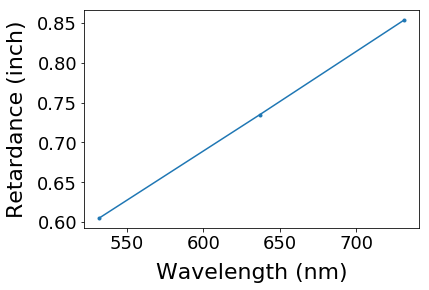

In [1]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import prettify_plot
import numpy as np

wvl = [532, 637, 731.2]
retardance = [0.6052, 0.735, 0.8536]
fig, ax = plt.subplots()
ax.plot(wvl, retardance, '.-')
prettify_plot(ax, "Wavelength (nm)", "Retardance (inch)")
